In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

import pandas as pd


In [47]:
#model = LinearRegression()
#model = LogisticRegression()



A 2-fold split is the simplest form of splitting data. It divides the dataset into two parts: one for training and the other for testing. The process generally involves training the model on the training data, then evaluating it on the test data.

In this case:

- The training set is used to train the model.
- The test set is used to evaluate the model’s performance.

While this is a basic approach, it’s a good starting point for small datasets where cross-validation might not be necessary. Example:

In [48]:
# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A 3-fold split is slightly more advanced. The data is divided into three parts:

- Training Set: Used to train the model.
- Validation Set: Used for hyperparameter tuning and model selection.
- Test Set: Used to evaluate the final model's performance.

This method provides better insight into how the model will perform on unseen data since it uses a separate validation set to fine-tune the model before final testing. Example:

In [49]:
from sklearn.model_selection import train_test_split

# First split for training and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split to separate validation and test sets (overall 60% / 20% / 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Cross-validation is a more robust approach where the data is split into n folds. The model is trained on n-1 folds and tested on the remaining fold. This process is repeated n times, each time with a different fold as the test set. The results are averaged to give a more reliable estimate of model performance.

For example, in 5-fold cross-validation:
- The data is split into 5 folds.
- The model is trained on 4 of the 5 folds and tested on the 1 remaining fold.
- This process is repeated 5 times, each time with a different fold as the test set.

This method helps to ensure that the model is evaluated across all data points, providing a better estimate of its performance compared to a single train-test split.



In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation MSE scores: ", -scores)
# Negative MSE (because Scikit-learn returns negative values)
print("Average MSE: ", -scores.mean())  # Average MSE across all folds



Cross-validation MSE scores:  [0.00780395 0.01771422 0.01275039 0.01116348 0.00978431]
Average MSE:  0.011843268214336464


## Hands on practice I:

The Iris dataset is one of the most famous datasets for machine learning classification problems. It contains measurements of 150 iris flowers from three different species: setosa, versicolor, and virginica. The goal is to predict the species of the iris based on its features. You can load dataset with this example:

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [53]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [54]:
df = pd.DataFrame(np.column_stack((X, y)), columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Class'])

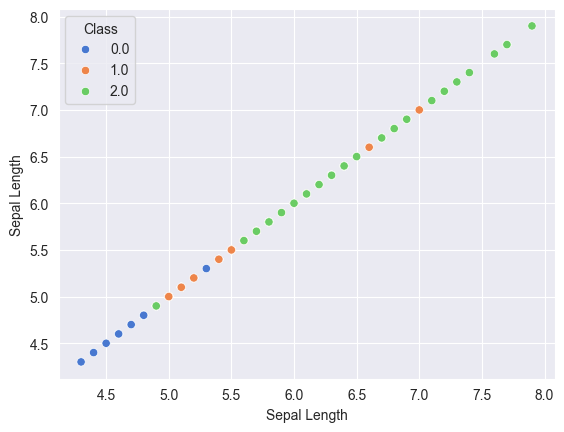

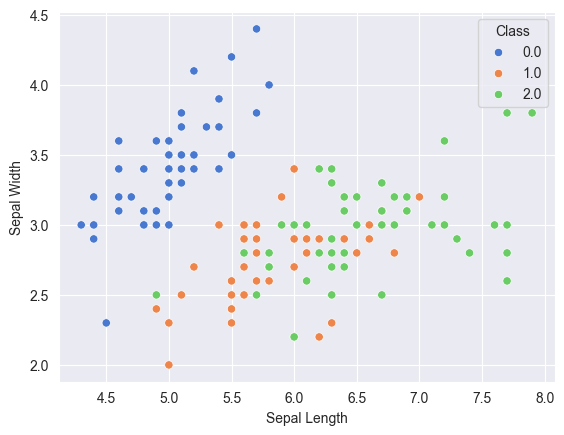

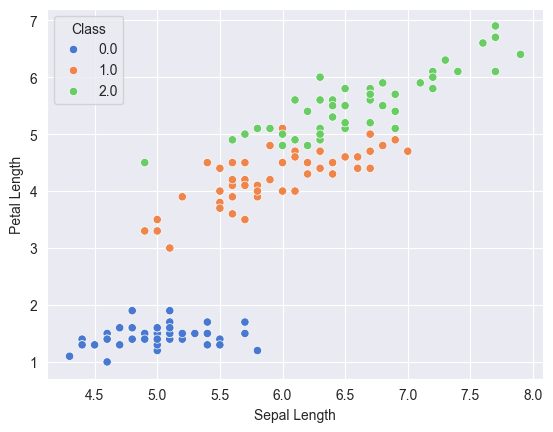

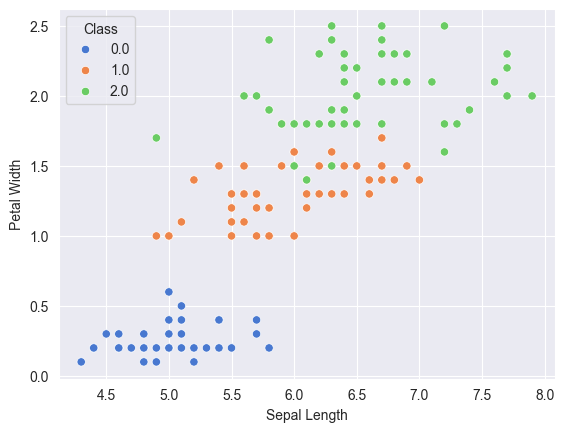

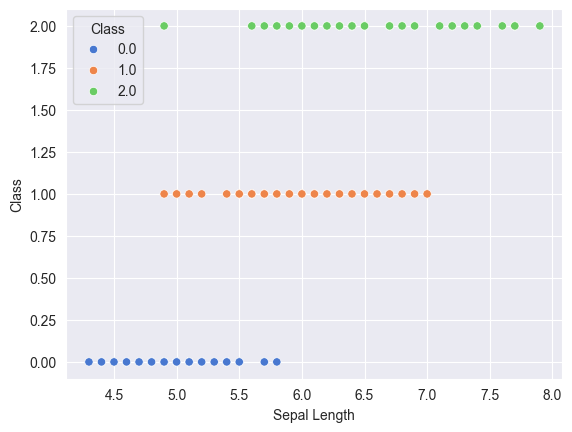

In [55]:
for col in df.columns:
    sns.scatterplot(data=df, x='Sepal Length', y=col, hue='Class', palette='muted')
    plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# import the class
model = LogisticRegression(random_state=16)

# fit the model with data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [57]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


Text(0.5, 427.9555555555555, 'Predicted label')

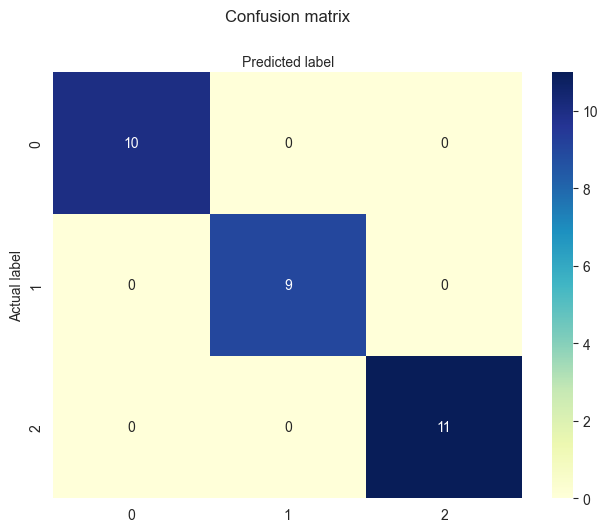

In [58]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label');

In [59]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


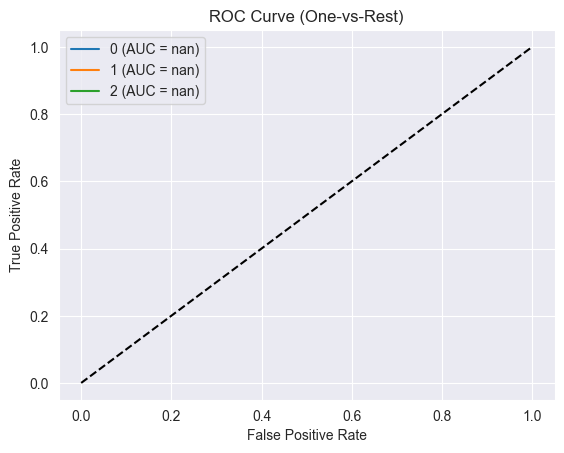

In [60]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Suppose you have 3 classes
classes = ['0', '1', '2']

# Binarize the labels (one-hot encode them)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()


## Split Results 70/30

In [61]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# import the class
model = LogisticRegression(random_state=16)

# fit the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

Text(0.5, 427.9555555555555, 'Predicted label')

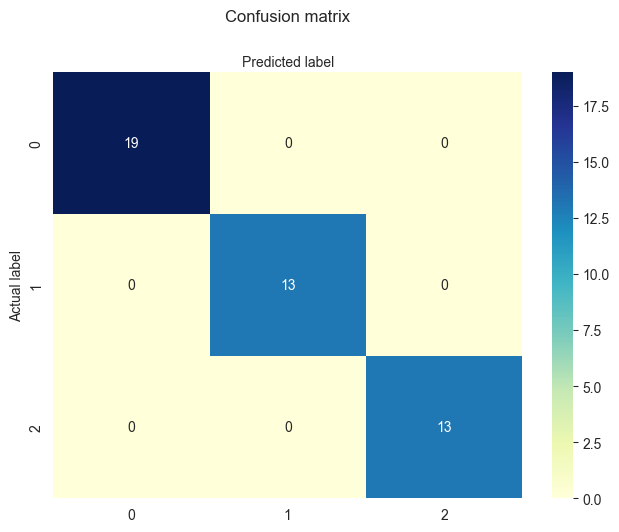

In [62]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


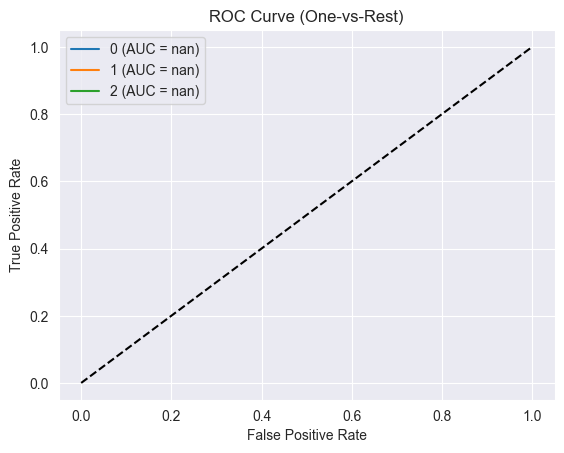

In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Suppose you have 3 classes
classes = ['0', '1', '2']

# Binarize the labels (one-hot encode them)
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()


# Data Preprocessing


### 📏 Normalisation (Min-Max scaling)
**What it does**:
Rescales all values into a specific range, usually 0 to 1 (or sometimes −1 to 1).


### 🧮 Standardisation (Z-score scaling)
**What it does**:
Transforms your data so that each feature has:
- a mean of 0, and
- a standard deviation of 1



| Feature                | Standardisation              | Normalisation         |
| ---------------------- | ---------------------------- | --------------------- |
| Output range           | Mean 0, SD 1                 | 0–1 (or −1–1)         |
| Formula                | (x−μ)/σ                      | (x−min)/(max−min)     |
| Preserves shape?       | Yes (shifts & scales)        | Yes (rescales)        |
| Sensitive to outliers? | Less so                      | More so               |
| Good for               | Gaussian data, linear models | Bounded data, NN, KNN |


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

NameError: name 'X_numeric' is not defined

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric)

NameError: name 'X_numeric' is not defined

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_categorical)


NameError: name 'X_categorical' is not defined

In [68]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'income']),
        ('cat', OneHotEncoder(), ['gender', 'city'])
    ]
)

X_preprocessed = preprocessor.fit_transform(df)

ValueError: A given column is not a column of the dataframe

In [69]:
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression()

# import the class
model = LogisticRegression(random_state=42)

# fit the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5)
print(scores)
print("Average CV accuracy:", scores.mean())

[0.96666667 1.         0.93333333 0.9        1.        ]
Average CV accuracy: 0.9600000000000002


### Wine Dataset

In [71]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df[['alcohol','malic_acid','magnesium']]
y = wine.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [72]:
X.isna().sum()

alcohol       0
malic_acid    0
magnesium     0
dtype: int64

In [73]:
X = df.to_numpy()

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# import the class
model = LogisticRegression(random_state=42)

# fit the model with data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_normalized, y, cv=5)
print(scores)
print("Average CV accuracy:", scores.mean())

[1. 1. 1. 1. 1.]
Average CV accuracy: 1.0


## California Dataset

In [76]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
df = california.frame

In [77]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [78]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [79]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: ylabel='AveOccup'>

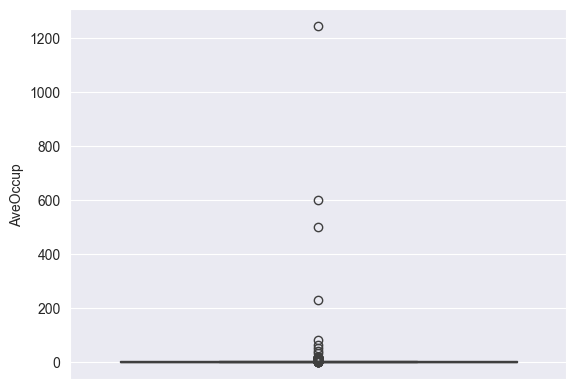

In [80]:
sns.boxplot(df['AveOccup'])

In [81]:
df[df['AveOccup'] > 10].sort_values(by='AveOccup', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500


In [82]:
df.drop(df[df['AveOccup'] > 10].index, inplace=True)


In [83]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000,20603.000000
mean,3.870548,28.637092,5.428533,1.096540,1423.339368,2.918517,35.631012,-119.569189,2.069010
std,1.897012,12.580805,2.471073,0.473866,1128.241516,0.765234,2.135875,2.003460,1.153654
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564350,18.000000,4.440829,1.006135,787.000000,2.428935,33.930000,-121.800000,1.196000
50%,3.534900,29.000000,5.229682,1.048749,1166.000000,2.817259,34.260000,-118.490000,1.798000
75%,4.743850,37.000000,6.052108,1.099418,1724.000000,3.279038,37.710000,-118.010000,2.649000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,9.954545,41.950000,-114.310000,5.000010



## Naive Bayes

Here’s why Naive Bayes is a great tool to have in your ML toolbox:

- ✅ It’s fast to train and predict, even on large datasets.
- ✅ It works well with categorical and text-based data (e.g., spam detection, sentiment analysis).
- ✅ It’s easy to interpret and understand.

Under the hood, Naive Bayes models calculate the probability of each class given the input features, and then choose the class with the highest probability. There are different types of Naive Bayes depending on how the features are distributed (e.g., Gaussian, Multinomial, or Bernoulli), and you can choose the one that fits your data best.

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Create dummy data
data = {
    'age': [22, 25, 47, 52, 46, 56, 55, 60, 34, 28],
    'salary': [15000, 18000, 85000, 90000, 70000, 100000, 95000, 105000, 65000, 40000],
    'bought': [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]  # 1 = bought product, 0 = did not buy
}

df = pd.DataFrame(data)

# Step 2: Features and target
X = df[['age', 'salary']]
y = df['bought']

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Fit a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions: [1 0 1]
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [0 1]]


## KNN Neighbours

To classify a new data point, KNN looks at the k closest points in the training set—its “neighbors”—and predicts the majority class among them. It’s like asking, “What class do the nearby points belong to?” and going with the most common answer.

Why KNN is worth knowing:

✅ It’s easy to understand and implement.
✅ It works well for problems where decision boundaries are irregular or nonlinear.
✅ It can be used for classification or regression.
However, because KNN relies on the full dataset for every prediction, it can be slow on large datasets, and its performance depends heavily on how distance is measured and the value of k (how many neighbors to consider).



In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Dummy data
data = {
    'age': [22, 25, 47, 52, 46, 56, 55, 60, 34, 28],
    'salary': [15000, 18000, 85000, 90000, 70000, 100000, 95000, 105000, 65000, 40000],
    'bought': [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)

# Step 2: Features and target
X = df[['age', 'salary']]
y = df['bought']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Feature scaling (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Fit KNN model (try k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test_scaled)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions: [1 0 1]
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [0 1]]


## Exercise

Train different Naive Bayes models & KNNS from scikit-learn ecosystem and evaluate their performance in comparison to Logistic regression.



In [86]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(np.column_stack((X, y)), columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width','Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


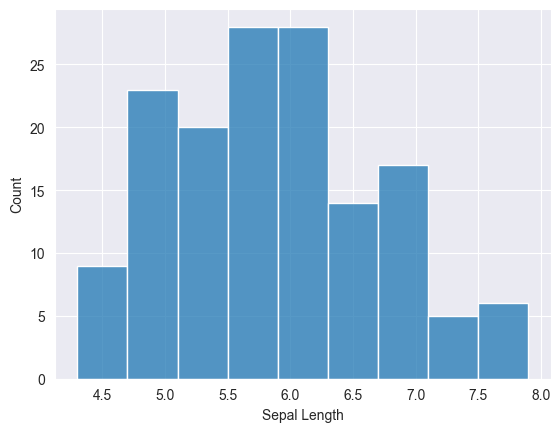

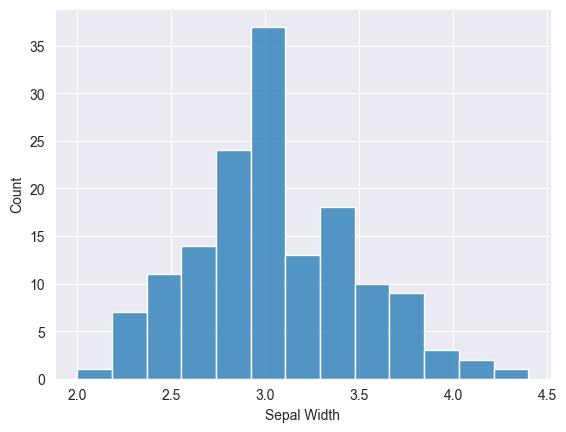

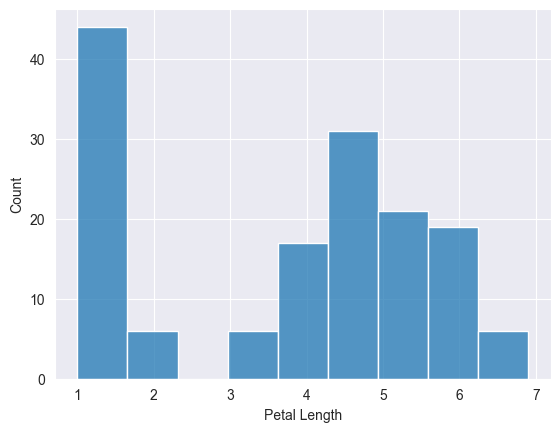

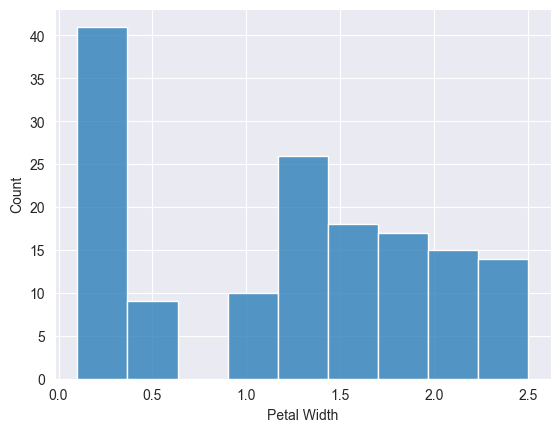

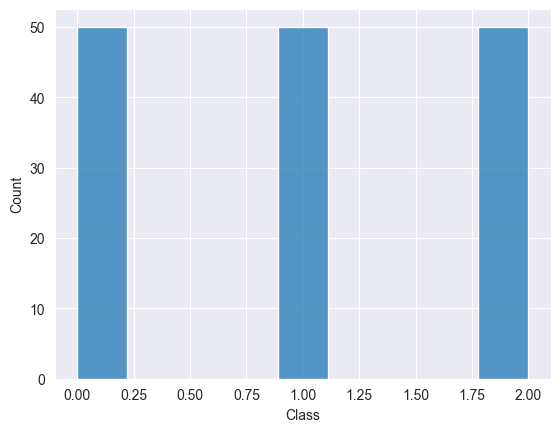

In [87]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    plt.show()

We'll standardise Sepal Length and Width seeing as they're normally distributed.

We'll normalise Petal Length and Width seeing as they're left skewed.

In [88]:
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Class           float64
dtype: object

In [89]:
# We'll standardise Sepal Length and Width seeing as they're normally distributed.

cols_to_scale = ['Sepal Length', 'Sepal Width']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])

In [90]:
# We'll normalise Petal Length and Width seeing as they're left skewed.

cols_to_norm = ['Petal Length', 'Petal Width']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])


In [91]:
# Step 4: Fit a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Predictions: [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate
print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Predictions: [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Regularisation

As you start building machine learning models, you’ll quickly notice a common problem: some models perform extremely well on training data but poorly on unseen data. This is a classic case of overfitting—and regularization is one of the most effective tools to fight it.

Regularization is a technique used to constrain or penalize complex models, so they don’t "memorize" the training data too closely. The goal is to find a balance between fitting the data well and keeping the model simple enough to generalize to new data.

We typically apply regularization to models that learn weights or coefficients, like linear regression, logistic regression, and support vector machines (SVMs).

Without regularization, models can become overly flexible, learning not just the general pattern, but also noise or quirks in the training set. This leads to low training error but high test error—a sure sign of overfitting.

Regularization works by adding a penalty term to the model’s loss function, discouraging large or unnecessary weights.

L2 Regularization (Ridge) penalizes the sum of squared weights. It prefers to spread out the error across all features by shrinking weights smoothly. L2 doesn't zero out weights completely but pulls them toward zero, helping reduce model complexity.

L1 Regularization (Lasso) penalizes the sum of absolute values of the weights. It has a special property: it can force some weights to exactly zero, which means it also does feature selection. This is useful when you suspect that only a subset of features are important.

Elastic Net combines the strengths of both L1 (Lasso) and L2 (Ridge) regularization. It adds a penalty that’s a mixture of absolute and squared coefficients, giving you the benefits of feature selection from L1 and stability from L2. This is especially useful when you have many correlated features—a case where Lasso might randomly select just one and ignore others. Elastic Net balances them, often leading to better, more reliable models.

Code examples for different models provided below. In scikit-learn C parameter is controlling the strength for regularization.



In [93]:
# Logistic regression:

from sklearn.linear_model import LogisticRegression

# L2 regularization (default)
logreg_l2 = LogisticRegression(penalty='l2', C=1.0)

# L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Elastic Net regularization
logreg_elastic = LogisticRegression(penalty='elasticnet', solver='saga',
																		l1_ratio=0.5, C=1.0)

In [94]:
# Linear regression:


from sklearn.linear_model import Ridge, Lasso, ElasticNet

# L2 regularization (Ridge)
ridge = Ridge(alpha=1.0)

# L1 regularization (Lasso)
lasso = Lasso(alpha=0.1)

# Elastic Net regularization
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [95]:
# SVMs

from sklearn.svm import LinearSVC, SVC

# L2 regularization (default for SVMs)
svm_l2 = LinearSVC(penalty='l2', C=1.0)

# L1 regularization (requires 'liblinear' dual=False)
svm_l1 = LinearSVC(penalty='l1', dual=False, C=1.0)

# L2 regularization (default for SVC)
svc_l2 = SVC(kernel='linear', C=1.0)

# Polynomial kernel with L2 regularization
svc_poly_l2 = SVC(kernel='poly', degree=3, C=1.0)

# RBF kernel with L2 regularization
svc_rbf_l2 = SVC(kernel='rbf', C=1.0)

### Exercise

In [96]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df[['alcohol','malic_acid','magnesium']]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [97]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

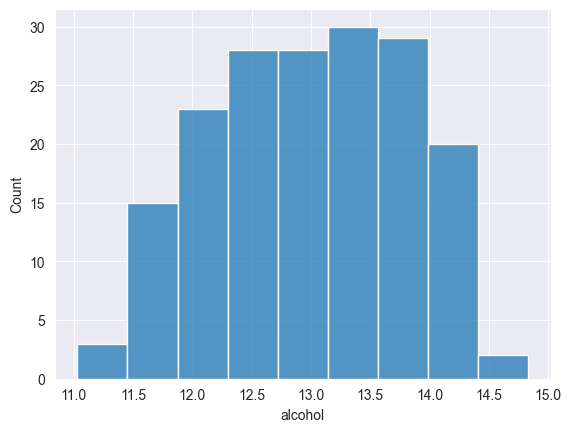

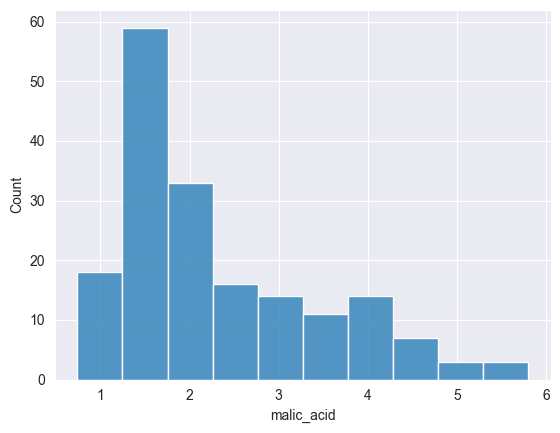

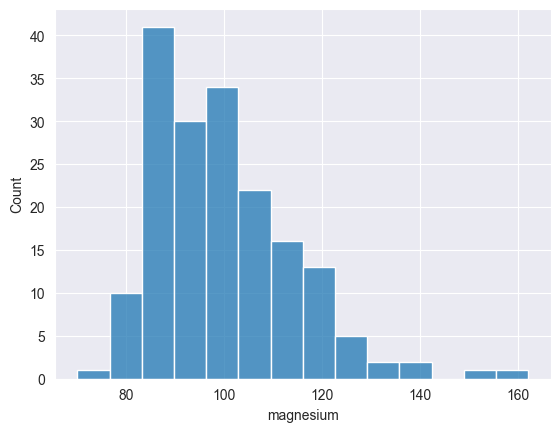

In [98]:
for col in X.columns:
    sns.histplot(data=X, x=col)
    plt.show()

In [99]:

# --- Scale and normalise subsets ---
# 1️⃣ Standardise certain columns
cols_to_scale = ['alcohol']
scaler_std = StandardScaler()

X_train_std = pd.DataFrame(
    scaler_std.fit_transform(X_train[cols_to_scale]),
    columns=cols_to_scale,
    index=X_train.index
)
X_test_std = pd.DataFrame(
    scaler_std.transform(X_test[cols_to_scale]),
    columns=cols_to_scale,
    index=X_test.index
)

# 2️⃣ Normalise other columns
cols_to_norm = ['malic_acid', 'magnesium']
scaler_norm = MinMaxScaler()

X_train_norm = pd.DataFrame(
    scaler_norm.fit_transform(X_train[cols_to_norm]),
    columns=cols_to_norm,
    index=X_train.index
)
X_test_norm = pd.DataFrame(
    scaler_norm.transform(X_test[cols_to_norm]),
    columns=cols_to_norm,
    index=X_test.index
)

# --- Combine everything back together ---
X_train_scaled = pd.concat([X_train_std, X_train_norm], axis=1)
X_test_scaled = pd.concat([X_test_std, X_test_norm], axis=1)

print("\n✅ Scaled training data sample:")
print(X_train_scaled.head())



✅ Scaled training data sample:
      alcohol  malic_acid  magnesium
158  1.665293    0.160896   0.304348
137 -0.549525    0.940937   0.282609
98  -0.745310    0.036660   0.195652
159  0.612948    0.158859   0.206522
38   0.111249    0.124236   0.304348


## BONUS: With Pipleine update

🤝 Why this is the “right way”
✔️ One single object handles ALL preprocessing

No manual concat, no repeating code.

✔️ Prevents data leakage

Only the training set is used to fit the scalers.

✔️ Fully scikit-learn compatible

You can plug this pipeline straight into a model:


In [100]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Define column groups ---
cols_to_scale = ['alcohol']
cols_to_norm = ['malic_acid', 'magnesium']

# --- Build ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), cols_to_scale),
        ('minmax_norm', MinMaxScaler(), cols_to_norm)
    ],
    remainder='passthrough'   # keeps other columns if they exist
)

# --- Build pipeline (preprocessing only for now) ---
pipe = Pipeline([
    ('preprocess', preprocessor)
])

# Fit on train only (prevents leakage)
pipe.fit(X_train)

# Transform
X_train_scaled = pipe.transform(X_train)
X_test_scaled = pipe.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=cols_to_scale + cols_to_norm,
                              index=X_train.index)

X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=cols_to_scale + cols_to_norm,
                             index=X_test.index)

print(X_train_scaled.head())


      alcohol  malic_acid  magnesium
158  1.665293    0.160896   0.304348
137 -0.549525    0.940937   0.282609
98  -0.745310    0.036660   0.195652
159  0.612948    0.158859   0.206522
38   0.111249    0.124236   0.304348


In [101]:
from sklearn.svm import SVC, LinearSVC


model_list = [KNeighborsClassifier(n_neighbors=3), GaussianNB(), SVC(kernel='poly', degree=3), SVC(kernel='rbf', gamma='scale'), LinearSVC(penalty='l1', dual=False, C=1.0), SVC(kernel='linear', C=1.0), SVC(kernel='poly', degree=3, C=1.0)]


for m in model_list:
    model = m
    model.fit(X_train, y_train)

    # Step 5: Make predictions
    y_pred = model.predict(X_test)

    # Step 6: Evaluate
    print(f"model: {m}")
    print("Predictions:", y_pred)
    print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

model: KNeighborsClassifier(n_neighbors=3)
Predictions: [0 2 2 0 1 0 1 0 0 2 0 0 2 1 0 1 1 1 0 1 0 1 1 2 1 2 0 0 1 0 0 1 0 0 1 0]
Accuracy: 0.722
Confusion Matrix:
 [[11  1  2]
 [ 3 11  0]
 [ 3  1  4]]
model: GaussianNB()
Predictions: [0 2 2 0 1 0 1 2 1 2 0 0 2 1 0 1 1 1 0 1 0 1 1 2 1 2 1 1 1 0 0 1 2 0 0 0]
Accuracy: 0.889
Confusion Matrix:
 [[12  0  2]
 [ 0 14  0]
 [ 1  1  6]]
model: SVC(kernel='poly')
Predictions: [0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]
Accuracy: 0.583
Confusion Matrix:
 [[ 7  7  0]
 [ 0 14  0]
 [ 2  6  0]]
model: SVC()
Predictions: [0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0]
Accuracy: 0.583
Confusion Matrix:
 [[ 9  5  0]
 [ 2 12  0]
 [ 4  4  0]]
model: LinearSVC(dual=False, penalty='l1')
Predictions: [0 2 2 0 1 0 1 2 1 0 0 0 2 2 0 1 1 1 0 1 0 1 1 2 1 0 1 1 1 0 0 1 2 0 0 0]
Accuracy: 0.806
Confusion Matrix:
 [[12  0  2]
 [ 0 13  1]
 [ 3  1  4]]
model: SVC(kernel='linear')
Predictions: [0 2 2 0 1 0 1 2 1 

/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Feature Engineering

Common Feature Engineering Techniques:
Creating New Features You can create new features based on domain knowledge or by combining existing ones.


Suppose we have 'height' and 'weight'
We can create a new feature: BMI (Body Mass Index)

`data['BMI'] = data['weight_kg'] / (data['height_m'] ** 2)`

Binning / Discretization Group continuous numerical values into categories to simplify patterns.
Age binning
`data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 60, 100], labels=['child', 'young_adult', 'adult', 'senior'])`

Extracting features from dates / strings
Timestamps or strings can be broken down into useful components.
Extract day of the week from date

`data['day_of_week'] = data['date'].dt.dayofweek`

Extract priority class from flight ticket number

`data['priority_class'] = data['ticked_number'].str.split('-')[3]`


Adding polynomial combinations of existing features can help capture non-linear relationships.

Automated

`from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[['feature1', 'feature2']])`

Manual

`data['x_squared'] = data.x.apply(lambda x: x**2)`


## Exercise

In [102]:
california = fetch_california_housing(as_frame=True)
df = california.frame


df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


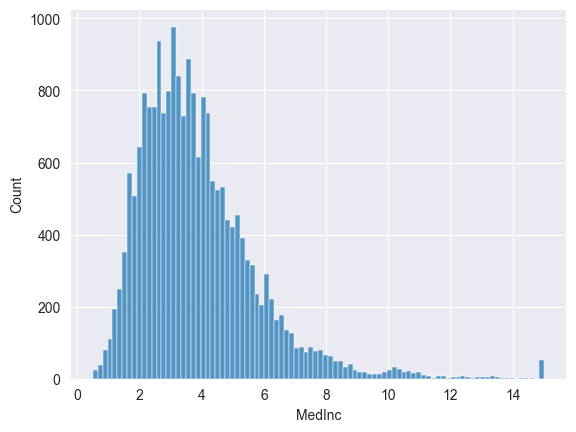

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64


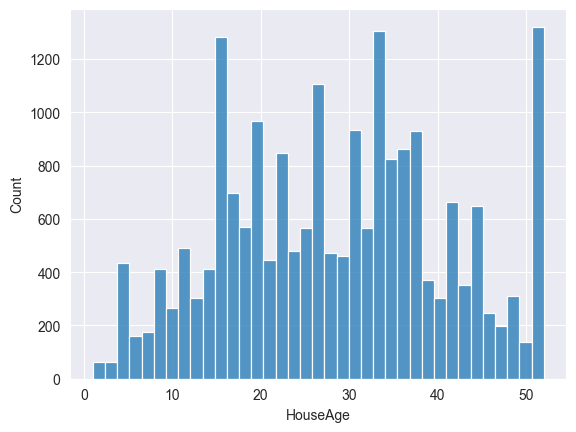

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64


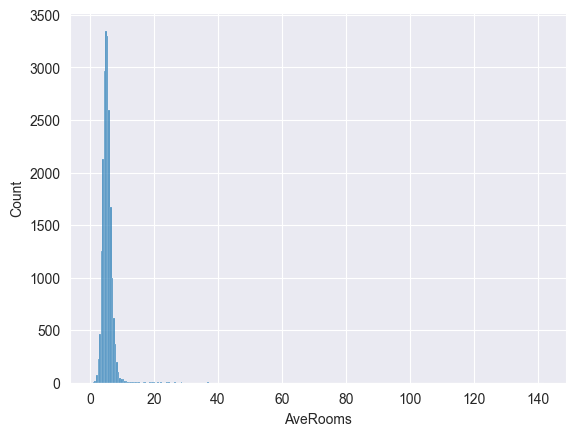

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64


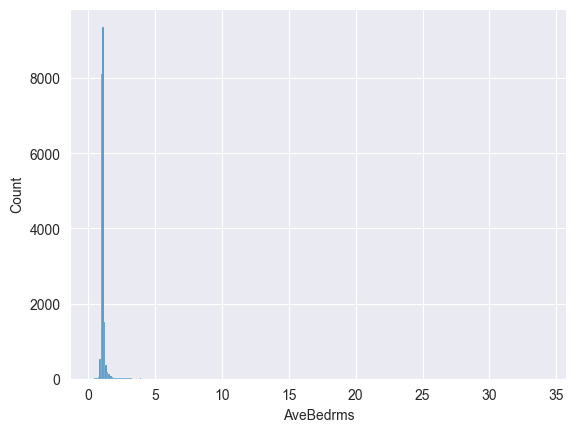

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64


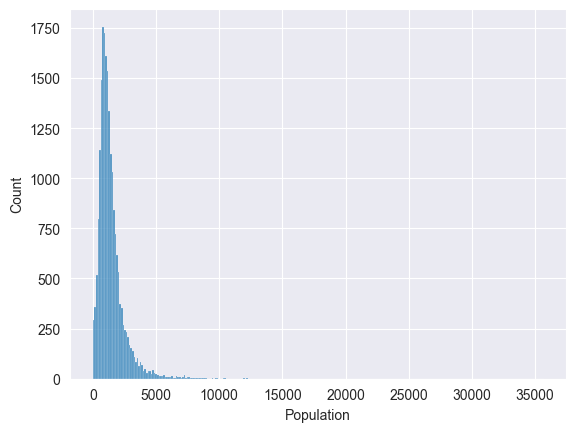

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64


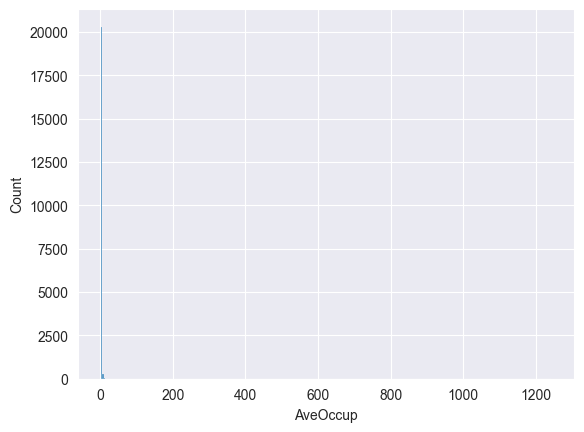

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


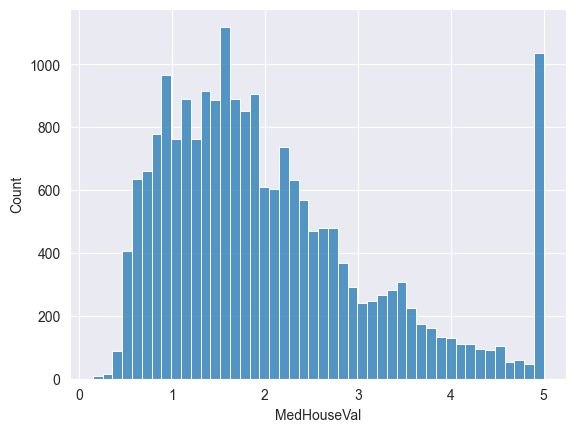

In [103]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    print(df[col].describe())
    plt.show()

In [104]:
# Apply logs here
df.drop(df[df['AveOccup'] > 10].index, inplace=True)

df['AveRooms'] = np.log1p(df['AveRooms'])
df['AveBedrms'] = np.log1p(df['AveBedrms'])
df['Population'] = np.log1p(df['Population'])



count    20603.000000
mean         3.870548
std          1.897012
min          0.499900
25%          2.564350
50%          3.534900
75%          4.743850
max         15.000100
Name: MedInc, dtype: float64


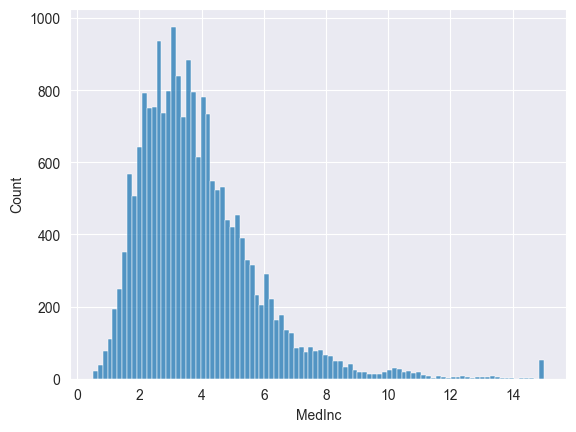

count    20603.000000
mean        28.637092
std         12.580805
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64


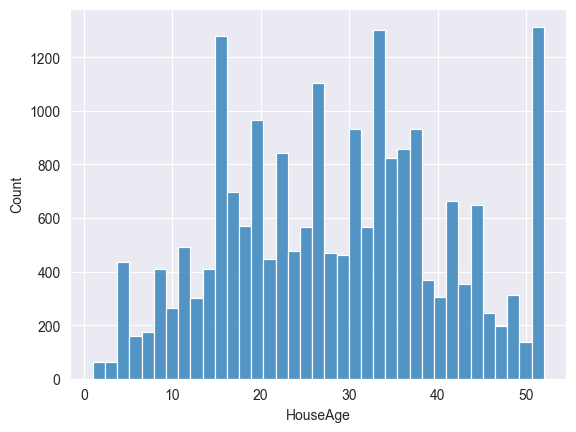

count    20603.000000
mean         1.828782
std          0.231433
min          0.613104
25%          1.693931
50%          1.829325
75%          1.953327
max          4.962209
Name: AveRooms, dtype: float64


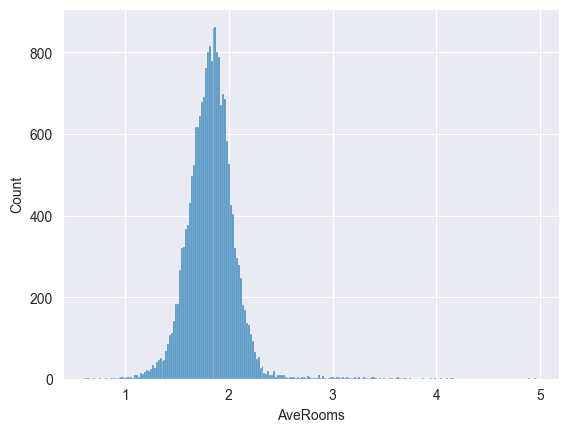

count    20603.000000
mean         0.731991
std          0.105223
min          0.287682
25%          0.696210
50%          0.717230
75%          0.741660
max          3.557251
Name: AveBedrms, dtype: float64


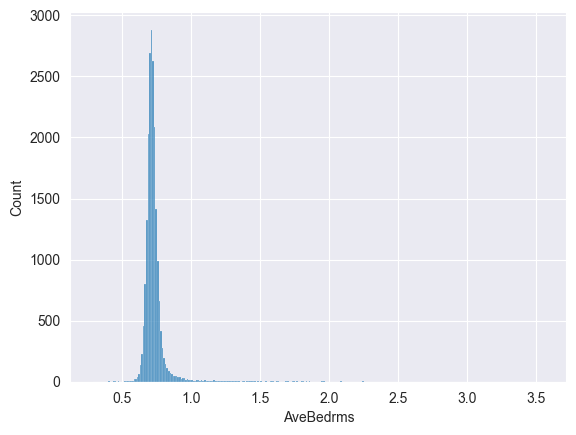

count    20603.000000
mean         7.025109
std          0.734285
min          1.386294
25%          6.669498
50%          7.062192
75%          7.452982
max         10.482430
Name: Population, dtype: float64


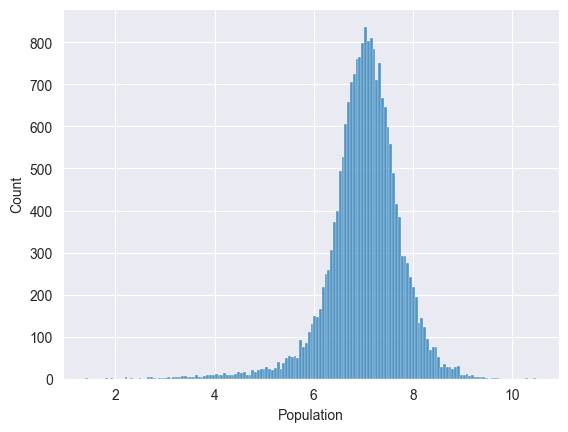

count    20603.000000
mean         2.918517
std          0.765234
min          0.692308
25%          2.428935
50%          2.817259
75%          3.279038
max          9.954545
Name: AveOccup, dtype: float64


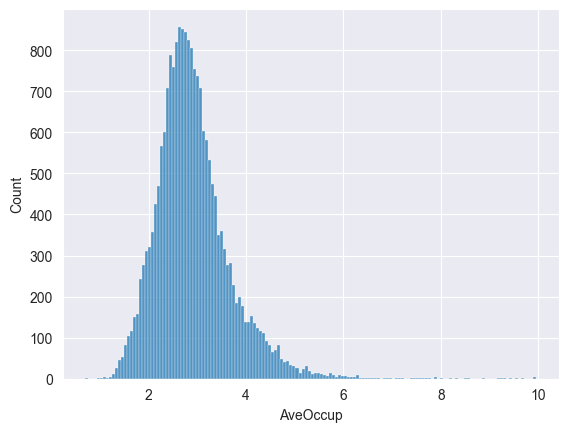

count    20603.000000
mean         2.069010
std          1.153654
min          0.149990
25%          1.196000
50%          1.798000
75%          2.649000
max          5.000010
Name: MedHouseVal, dtype: float64


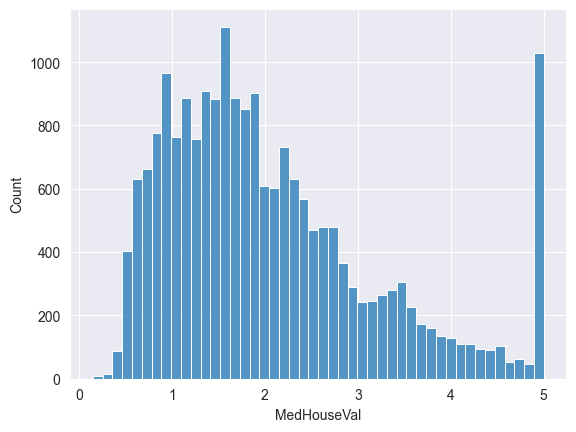

In [105]:
for col in df.columns:
    sns.histplot(data=df, x=col)
    print(df[col].describe())
    plt.show()

In [106]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,2.077455,0.704982,5.777652,2.555556,4.526
1,8.3014,21.0,1.979364,0.678988,7.784057,2.109842,3.585
2,7.2574,52.0,2.228738,0.729212,6.208590,2.802260,3.521
3,5.6431,52.0,1.919471,0.729025,6.326149,2.547945,3.413
4,3.8462,52.0,1.985385,0.732888,6.338594,2.181467,3.422


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
# --- Define column groups ---
cols_to_scale = ['AveOccup','Population','AveBedrms','AveRooms']
cols_to_norm = ['MedInc']


# Build full output column order BEFORE the transform
remaining_cols = [c for c in X_train.columns
                  if c not in cols_to_scale + cols_to_norm]

output_cols = cols_to_scale + cols_to_norm + remaining_cols

# --- Build ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), cols_to_scale),
        ('minmax_norm', MinMaxScaler(), cols_to_norm)
    ],
    remainder='passthrough'    # keep other features
)

# --- Build pipeline ---
pipe = Pipeline([
    ('preprocess', preprocessor)
])


# Fit on train only (prevents leakage)
pipe.fit(X_train)

# Transform
X_train_scaled = pipe.transform(X_train)
X_test_scaled = pipe.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=output_cols,
                              index=X_train.index)

X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=output_cols,
                             index=X_test.index)

In [109]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=6, noise=0.1, random_state=42)

model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation MSE scores: ", -scores)
# Negative MSE (because Scikit-learn returns negative values)
print("Average MSE: ", -scores.mean())  # Average MSE across all folds




Cross-validation MSE scores:  [0.01997684 0.00838844 0.00556417 0.01904945 0.01241998]
Average MSE:  0.013079775758077252


In [110]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 2956.087280870582
RMSE: 3057.1208326718843
R²: -7046579.263716088


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Feature Engineering

Good feature selection can:

- Improve model performance by removing noisy or irrelevant features.
- Reduce overfitting by eliminating unnecessary complexity.
- Speed up training by working with smaller datasets.
- Make models easier to interpret.

Especially with high-dimensional datasets, feature selection can be the difference between a mediocre and a high-performing model.


Filter Methods

Filter methods select features based on their statistical properties, independently of any machine learning model.

Examples:

Variance Threshold: Remove features with low variance (they don’t change much across samples).
Statistical tests: Like ANOVA F-test for classification tasks.

In [112]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

Wrapper Methods

Wrapper methods select features by training models and evaluating performance to choose the best subset.

Examples:

Recursive Feature Elimination (RFE): Start with all features, remove the least important one iteratively.
Sequential Feature Selection (SFS) is a greedy algorithm that selects features by either adding or removing them one at a time, based on model performance.

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)
X_reduced = selector.fit_transform(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Embedded Methods

Embedded methods perform feature selection during model training. Regularization techniques like Lasso (L1 penalty) naturally shrink some feature coefficients to zero, effectively selecting features.

In [114]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X, y)
important_features = model.coef_ != 0

## Handling imbalanced data:

In many real-world problems, the data you work with is imbalanced — meaning one class or outcome appears far more frequently than others. For instance, in medical diagnosis datasets, 95% of cases might be healthy and only 5% diseased. Standard machine learning models tend to favor the majority class, leading to poor performance on the minority (but often most important!) class.

Imbalanced data can result in:

- Misleading accuracy: A model predicting only the majority class may show high accuracy but fail completely on the minority.
- Poor generalization: The model learns to ignore minority classes.
- Bias: Crucial use cases like fraud detection, cancer detection, or fault diagnosis suffer when the minority class isn’t properly learned.

In the examples how to handle data imbalance, we will use imblearn library, so make sure to have it in your environment before jumping into code examples.

`pip install imblearn`



Techniques to handle data imbalance:

Undersampling the majority class. It simply removes samples from the majority class to balance the dataset.

In [115]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Oversampling the minority class. It creates synthetic samples of the minority class. Important note: on real life problems, oversampling tends to be working quite poorly.

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

Using class weights. It assigns more weight to the minority class.

In [116]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
# class weights could be also dictionary
# where specific weight is assigned to each category

model.fit(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Using balance-agnostic models

In [117]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)

While less common, imbalance can occur in regression too — when certain ranges of the target variable dominate the dataset. For example, house prices could be skewed heavily toward mid-range homes with few very high-priced examples. Common technique for dealing with imbalance is binning the target and providing sample weights based on the occurrences in each bin. Example:

In [118]:
from sklearn.utils.class_weight import compute_sample_weight

bins = np.quantile(y, [0, 0.33, 0.66, 1.0])
y_binned = pd.cut(y, bins=bins, labels=[0, 1, 2], include_lowest=True)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_binned)

model = LinearRegression()
model.fit(X, y, sample_weight=weights_train)

NameError: name 'weights_train' is not defined

### Robust classification metrics:

Balanced accuracy addresses a key flaw in standard accuracy: it gets inflated when the majority class dominates. Instead of measuring the overall proportion of correct predictions, balanced accuracy computes the average recall (true positive rate) for each class.

In [119]:
from sklearn.metrics import balanced_accuracy_score

ba = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", ba)

ValueError: continuous is not supported

In multiclass or imbalanced settings, the standard F1 score (which may be weighted by support) can mask poor performance on rare classes. Macro F1 resolves this by computing F1 independently for each class, then taking the average.

In [120]:
from sklearn.metrics import f1_score

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", macro_f1)

ValueError: continuous is not supported

While ROC-AUC is widely used, PR-AUC is more suitable for heavily imbalanced binary classification. This metric evaluates a model’s performance on the positive class by plotting: Precision (y-axis) vs Recall (x-axis) at various probability thresholds. The area under this curve gives a summary of how well the model maintains high precision and recall across thresholds.

In [121]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

## Exercise

We start off by making a random dataset for X and y. We'll then test and split the data for our training dataset then fit a simple logistoic regressioon. We know the dataset is imbalanced but let's see how intitial predictions perform.

In [127]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

X, y = make_classification(
    n_samples=5000, n_features=20,
    n_informative=2, n_redundant=10,
    n_classes=2, weights=[0.9, 0.1],
    flip_y=0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro F1 Score:", macro_f1)

[[1313   31]
 [  87   69]]
Macro F1 Score: 0.7480297922740524


Our confusion matrix shows we're identifying a lost of True Positives but that's because the dataset is imbalanced. You can see False Positives and False Negatives are just as bad as predicting as True negatives.

Although the F1 score (0.7–0.9: Strong performance) does reasonably well it's because we've correctlty identified the majority of the dominant class.

Let's see if we can use class weights to improve things.'

In [132]:
model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Macro F1 Score:", macro_f1)

[[1167  177]
 [  19  137]]
Accuracy: 0.869
Macro F1 Score: 0.752754183836515


Ok that seems to have done slightly better for true negatives despite losing a but of accuracy. But overall the balanced classes helps as we have a highjer F1 score and larger identfication of true negatives.

Let's see if random undersampling can help too.

In [135]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
model = LogisticRegression()

model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Macro F1 Score:", macro_f1)

[[132  18]
 [ 24 126]]
Accuracy: 0.86
Macro F1 Score: 0.8599439775910365


Nice! We increased F1 significantly without penalising accuracy.

PR AUC: 0.946


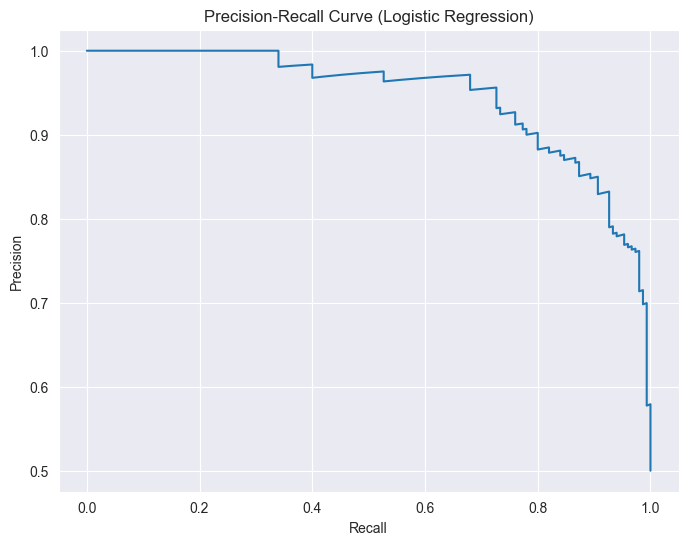

In [137]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities (needed for PR curve)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Step 2: Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Step 3: Calculate PR AUC
pr_auc = auc(recall, precision)
print("PR AUC:", round(pr_auc, 3))

# Step 4: Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.grid(True)
plt.show()


When learning about Logistic Regression, we take the straight line from the linear regression, take a log of the odds, compress our output variables to 0 or 1 and then fit an S curve.

We typically view the S to curve at 0.5 (decision threshold) to form whether a datapoints falls either side of 0 or 1. However this chart helps tell us whether this curve should be higher or lower in order to get better results.

If the PR curve is:
- High and flat → great model
- Low or quickly dropping → weaker model
- You pick the threshold by choosing the point on this curve that suits your business case

That’s the real purpose.

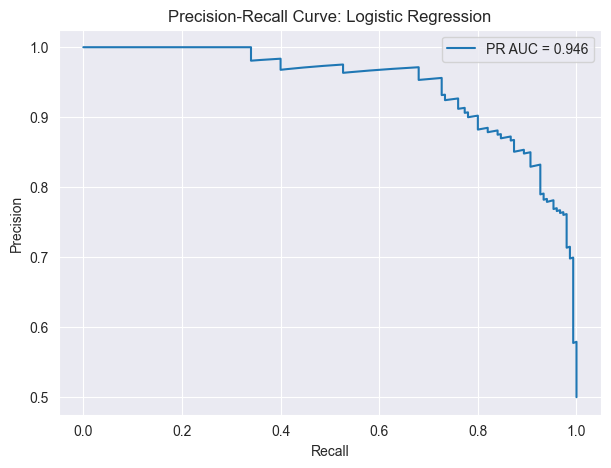

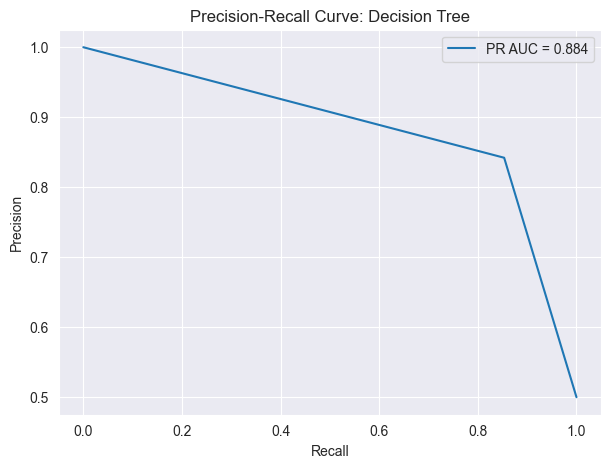

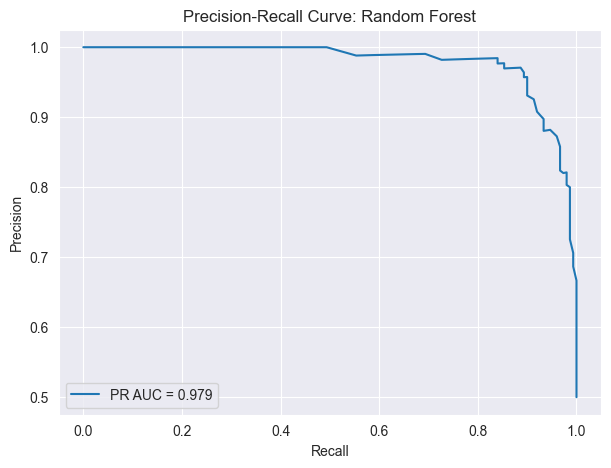

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(7,5))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {name}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal configuration of parameters that are set before a machine learning model begins learning from data. Unlike model parameters (like weights in linear regression), hyperparameters govern the learning process itself—for example, the regularization strength in logistic regression (C), the number of neighbors in KNN, or the kernel type in SVMs. Choosing good hyperparameters can significantly impact a model’s performance, generalization, and robustness, especially when working with limited or noisy data.

There are several common strategies for hyperparameter tuning. Grid search exhaustively tests all combinations from a predefined set, while random search samples from those ranges more efficiently. More advanced techniques, such as Bayesian optimization or adaptive search methods, learn from past evaluations to propose better configurations. These tuning methods are usually combined with cross-validation to ensure results are not overfitted to a single train-test split, giving a more reliable estimate of model performance across different data subsets.



In [176]:
from sklearn import svm, datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [177]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8233333333333334

In [178]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [179]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [180]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

We need to make this process more efficient

In [181]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval, C=cval, gamma='auto'), iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores


{'rbf_1': np.float64(0.9800000000000001),
 'rbf_10': np.float64(0.9800000000000001),
 'rbf_20': np.float64(0.9666666666666668),
 'linear_1': np.float64(0.9800000000000001),
 'linear_10': np.float64(0.9733333333333334),
 'linear_20': np.float64(0.9666666666666666)}

This is better but sklearn has something better

In [184]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear'],
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
df_results = pd.DataFrame(clf.cv_results_)

In [185]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000663,0.000124,0.000419,0.000099,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000398,0.000024,0.000255,0.000010,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000405,0.000028,0.000265,0.000022,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000338,0.000018,0.000220,0.000007,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000345,0.000015,0.000221,0.000008,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000307,0.000005,0.000199,0.000001,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


mean_test_score is what will be the most useful output. The first 3 settings are the best option.

In [187]:
df_results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [188]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_refit_for_multimetric',
 '_check_scorers_accept_sample_weight',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr

In [189]:
clf.best_score_

np.float64(0.9800000000000001)

In [190]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

Randomized search hyperparameter tuning, on the other hand, trades thoroughness for speed. Instead of trying every single combination, RandomizedSearchCV samples a fixed number of combinations from your parameter space. This makes it really handy when your grid would otherwise be huge. For example, you can define param_distributions = {'C': uniform(0.1, 10), 'gamma': expon(scale=0.1)} and tell it to try 20 different random combinations. Even though you might miss the absolute best set of parameters, you're often close enough—and way faster getting there. In scikit-learn, it looks something like this:

In [192]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, n_iter=2, return_train_score=False)

rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.980000
1,10,linear,0.973333


Choosing the best model

In [195]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [198]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear'],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,5,10],
        }
    }
}

In [200]:
import warnings
warnings.filterwarnings('ignore')

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model_name': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })

print(scores)

[{'model_name': 'svm', 'best_score': np.float64(0.9800000000000001), 'best_params': {'C': 1, 'kernel': 'rbf'}}, {'model_name': 'random_forest', 'best_score': np.float64(0.9533333333333334), 'best_params': {'n_estimators': 10}}, {'model_name': 'logistic_regression', 'best_score': np.float64(0.9666666666666668), 'best_params': {'C': 5}}]


## Exercise

In [255]:
from sklearn.datasets import load_wine

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


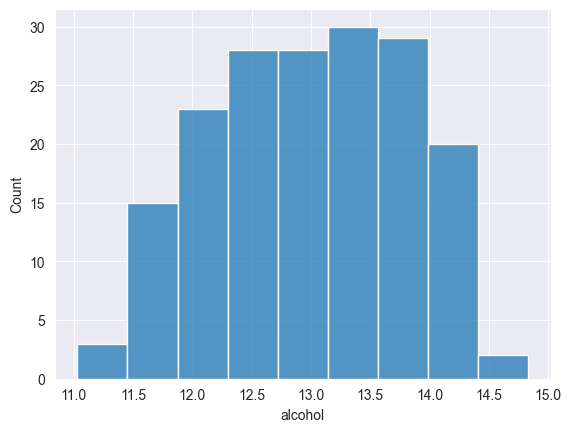

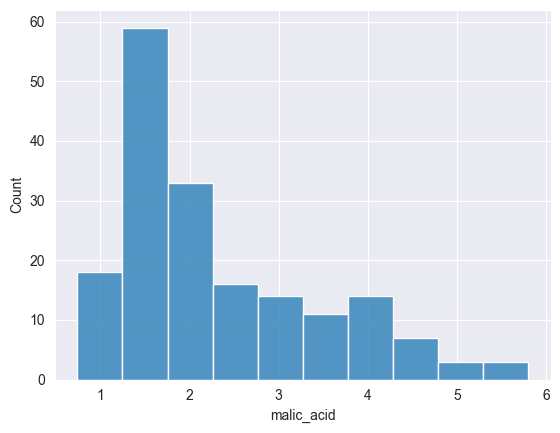

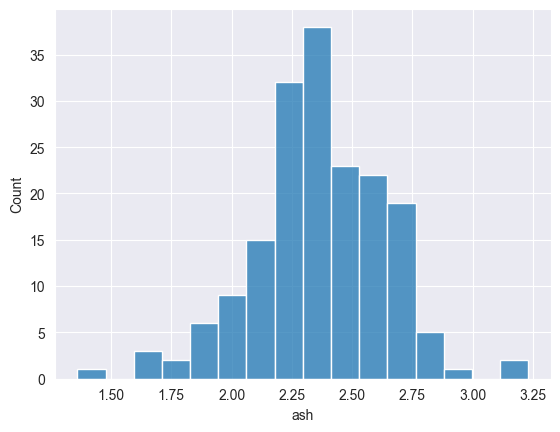

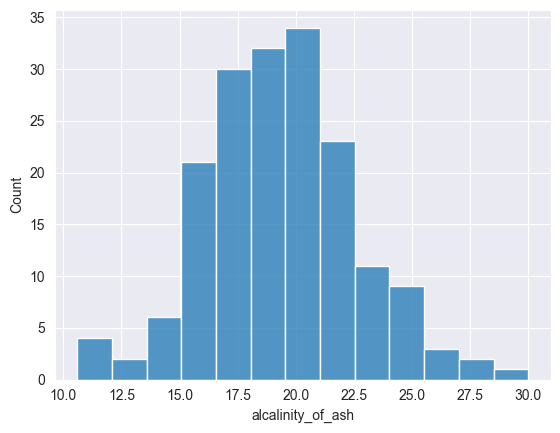

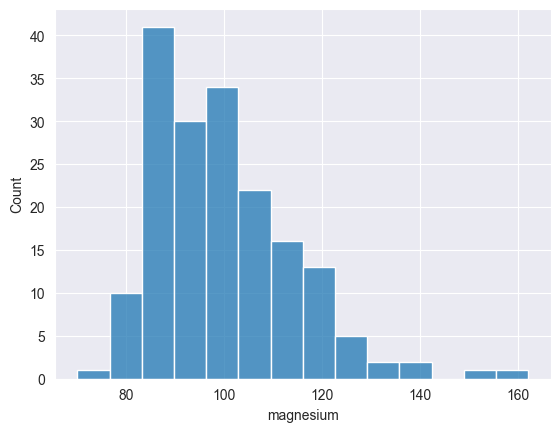

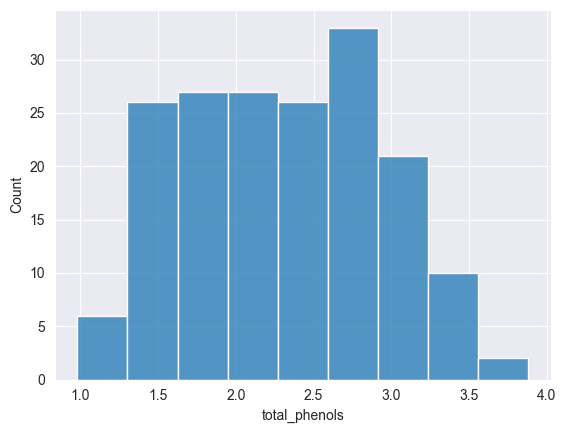

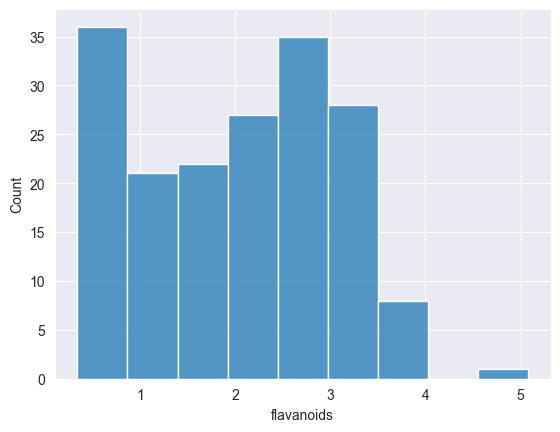

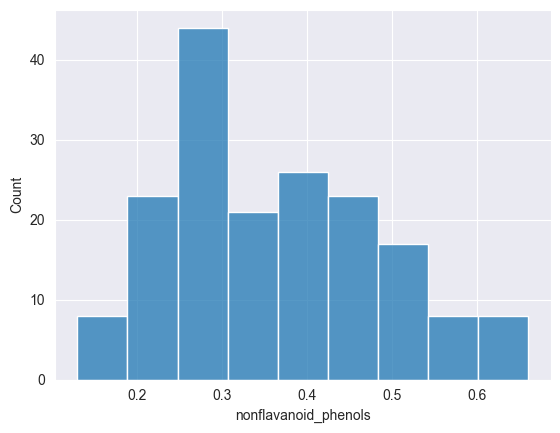

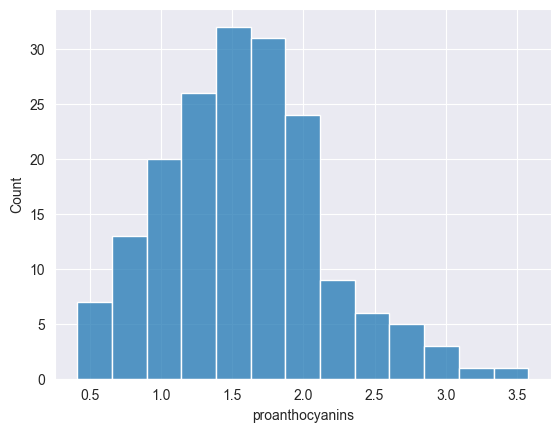

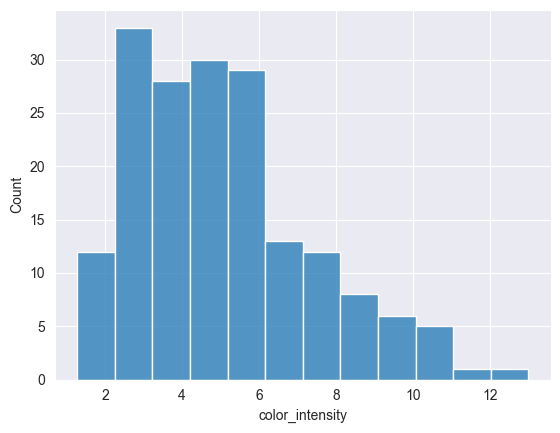

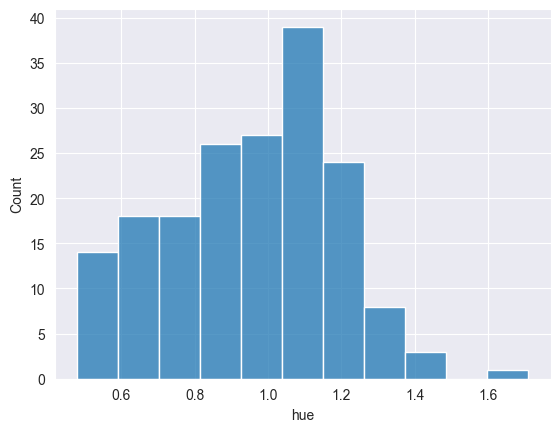

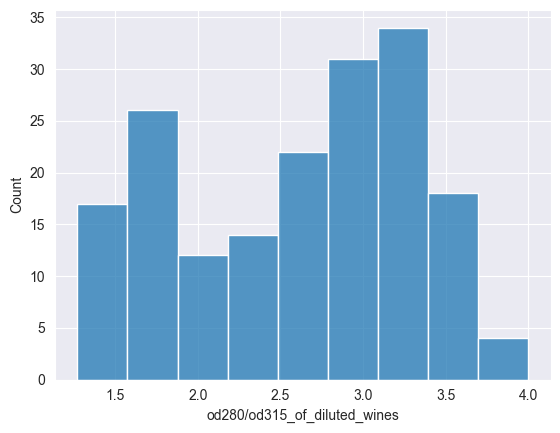

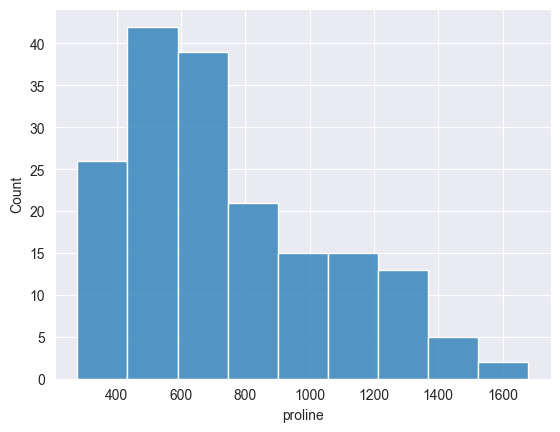

In [256]:
for col in X.columns:
    sns.histplot(data=X, x=col)
    plt.show()

In [257]:
# We'll standardise Sepal Length and Width seeing as they're normally distributed.

cols_to_scale = ['alcohol', 'ash', 'alcalinity_of_ash', 'total_phenols']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])

# We'll normalise Petal Length and Width seeing as they're left skewed.

cols_to_norm = ['malic_acid', 'magnesium', 'flavanoids', 'nonflavanoids_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'proline', '* od280/od315_of_diluted_wines']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])


In [258]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 0 1 0 0 1 2 0 0 0 0
 2 1 0 0 1 1 0 2 0 1 2 1 0 1 0 0 2]
Accuracy: 0.8703703703703703
Confusion Matrix:
 [[19  0  0]
 [ 3 17  1]
 [ 2  1 11]]


In [259]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Predictions:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Predictions: [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 0 1 2 2 2 1 1 1 0 0 1 2 0 0 0 0
 1 1 0 0 1 1 0 2 0 1 1 1 0 1 0 0 2]
Accuracy: 0.8888888888888888
Confusion Matrix:
 [[19  0  0]
 [ 2 19  0]
 [ 2  2 10]]


In [260]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5,7]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,5,10],
        }
    },
    'svm': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        },
    },
}

In [261]:
import warnings
warnings.filterwarnings('ignore')

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(wine.data, wine.target)
    scores.append({
        'model_name': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
    })

print(pd.DataFrame(scores))

            model_name  best_score                     best_params
0                  knn    0.702857              {'n_neighbors': 3}
1  logistic_regression    0.961111                        {'C': 1}
2                  svm    0.961111  {'C': 0.1, 'kernel': 'linear'}


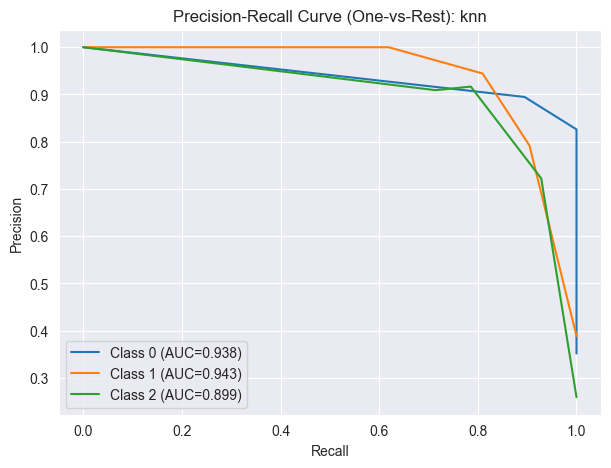

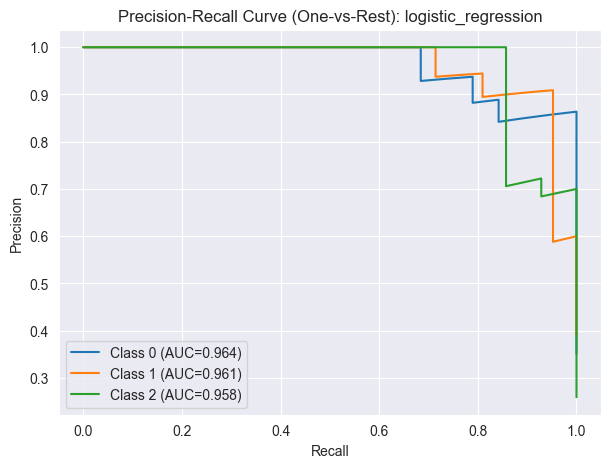

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [262]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Binarize the labels (3 classes → 3 one-vs-rest binary columns)
y_test_bin = label_binarize(y_test, classes=[0,1,2])

for name, model in best_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)

    plt.figure(figsize=(7,5))
    for i in range(3):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"Class {i} (AUC={pr_auc:.3f})")

    plt.title(f"Precision-Recall Curve (One-vs-Rest): {name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()


In [249]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


## Bayesian Search

Bayesian optimization is a smarter, more efficient way to tune hyperparameters compared to grid or randomized search. Instead of blindly searching through the space, it uses past results to decide what hyperparameters to try next—focusing on areas that are likely to yield better performance.

The idea is to model the objective function (like validation accuracy) using a surrogate function, often a Gaussian Process or Tree-structured Parzen Estimator (TPE), and then select new hyperparameters based on where the surrogate suggests improvement is likely. This makes Bayesian optimization particularly effective when evaluating models is expensive or time-consuming.

One of the most popular Python libraries for Bayesian optimization in machine learning is Optuna. It’s flexible, efficient, and integrates nicely with scikit-learn and other ML frameworks. You define an objective function that trains and evaluates your model, and Optuna handles the rest: selecting hyperparameter values, running trials, and keeping track of the best results. It can even prune bad trials early, saving time on unpromising configurations.


In [264]:
from sklearn.pipeline import make_pipeline
import optuna

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = ('liblinear' if penalty == 'l1' else
				      trial.suggest_categorical('solver', ['liblinear', 'lbfgs']))

    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=C, penalty=penalty, solver=solver,
         random_state=42, max_iter=1000)
    )

    score = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-11-17 17:06:03,226] A new study created in memory with name: no-name-022d229e-9e18-482e-baae-12c860d96a47
[I 2025-11-17 17:06:03,241] Trial 0 finished with value: 0.9550847457627119 and parameters: {'C': 0.02902118693882367, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 0 with value: 0.9550847457627119.
[I 2025-11-17 17:06:03,251] Trial 1 finished with value: 0.9664783427495293 and parameters: {'C': 0.3051591613828072, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 1 with value: 0.9664783427495293.
[I 2025-11-17 17:06:03,261] Trial 2 finished with value: 0.9720338983050847 and parameters: {'C': 2.470335383602244, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 2 with value: 0.9720338983050847.
[I 2025-11-17 17:06:03,272] Trial 3 finished with value: 0.9160075329566855 and parameters: {'C': 0.0022032990026159987, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 2 with value: 0.9720338983050847.
[I 2025-11-17 17:06:03,282] Trial 4 finished with value

Best hyperparameters: {'C': 70.7324595609704, 'penalty': 'l1'}
Best accuracy: 0.9832391713747647


In this example, Optuna tries 50 different combinations of hyperparameters and keeps track of which ones perform best using cross-validation. What makes this approach powerful is that Optuna doesn't just sample randomly—it learns from past trials to suggest more promising values next. This leads to better results with fewer evaluations, especially when tuning many parameters or working with large datasets.

Another strength of Optuna is how easy it is to scale. You can parallelize studies, integrate pruning to skip poorly performing trials early, and even visualize the optimization process. This makes it a great tool not just for hyperparameter tuning, but also for more general optimization problems in machine learning workflows.

## Understanding models’ parameters:

Each machine learning model introduced in this module comes with a set of hyperparameters — settings that you define before training. Choosing good values can dramatically improve model performance, and the range of values matters. Let’s explore the most important ones for each model:

### Logistic regression key hyperparameters:
- C: Inverse of regularization strength. Smaller values specify stronger regularization.
    - Range: typically between 1e-4 and 1e2. Try [0.001, 0.01, 0.1, 1, 10, 100].
- penalty: Type of regularization.
    - Options: 'l1', 'l2', 'elasticnet', 'none'.
- solver: Algorithm for optimization.
    - 'liblinear' supports L1 and L2.
    - 'saga' supports all penalties and works for larger datasets.
- l1_ratio: For elastic net only. Balance between L1 and L2 regularization.
    - Range: [0.0, 1.0].

### KNN key hyperparameters:
- n_neighbors: Number of neighbors to consider.
    - Range: [1, 3, 5, 7, 9, 11, 15]. Smaller = more complex decision boundary.
- weights: Weight function used in prediction.
    - Options: 'uniform' (equal weight) or 'distance' (closer neighbors weigh more).
- metric: Distance metric.
    - Common choice: 'minkowski', with p=2 (Euclidean) or p=1 (Manhattan).

### SVM key hyperparameters:
- C: Regularization parameter. Controls margin softness.
    - Range: [0.01, 0.1, 1, 10, 100].
- kernel: Kernel type — defines the decision boundary shape.
    - Options: 'linear', 'poly', 'rbf', 'sigmoid'.
- degree: For 'poly' kernel. Polynomial degree.
    - Range: [2, 3, 4, 5].
- gamma: Controls influence of points in 'rbf', 'poly', and 'sigmoid' kernels.
    - Range: 'scale', 'auto', or float values like [1e-3, 1e-2, 0.1, 1].

### Naive Bayes key hyperparameters:
- var_smoothing (GaussianNB): Additive value to variance for stability.
    - Range: 1e-9 to 1e-6.
- alpha (Multinomial/BernoulliNB): Additive smoothing parameter (Laplace smoothing).
    - Range: [0.0, 0.01, 0.1, 1.0].

### Linear / Ridge / Lasso / Elastic Net Regression key hyperparameters:
- alpha: Regularization strength.
    - Range: [0.01, 0.1, 1.0, 10.0, 100.0]. Higher → more regularization.
- l1_ratio (ElasticNet only): Mix between L1 and L2.
    - Range: [0.0, 0.5, 1.0].

Hyperparameter ranges should depend on:
- Number of features (more features → more regularization may help).
- Number of samples (small datasets → avoid overfitting with simpler models).
- Type of model (e.g., KNN relies heavily on distance, so preprocessing matters more).


## Modelling framework:

When approaching a machine learning problem with tabular data, having a clear and consistent modeling workflow is essential. Whether you're building your first model or refining your approach to solve real-world problems, this framework offers a step-by-step guide to structure your work — from raw data to evaluated model. Note: it’s not written in stone, you can modify it and make sure it fits your own needs.

### Step 1: Understand the Problem and the Data

Before writing any code, start with the problem definition. Are you predicting a numeric outcome (regression) or a category (classification)? What metric will define success — accuracy, precision, recall, F1-score, or R²?

Once you understand the goal, explore your dataset:

What are the features and target?

Are there missing values, duplicates, or anomalies?

What are the data types — numerical or categorical?

Is the dataset imbalanced (e.g., many more negative than positive cases)?

This step informs your modeling decisions and highlights any data quality issues early on.

### Step 2: Preprocess the Data

Real-world data is rarely model-ready. Clean and transform it to ensure your models can learn effectively.

🔹 Handle missing values Fill numerical features with the mean, median, or a constant.

Fill categorical features with the most frequent value or create a special "missing" category.

🔹 Encode categorical variables Use One-Hot Encoding for features with a small number of categories.

Avoid encoding high-cardinality features blindly — they can lead to dimensionality issues.

🔹 Scale numerical features Some models are sensitive to feature scales:

Use StandardScaler (Z-score) for models like logistic regression and SVMs.

Use MinMaxScaler for models like KNN or when working with normalized input ranges.

### Step 3: Split the Data

To properly evaluate performance, split your data into:

Training set — used to train the model.

Validation set — used to tune and select the best model.

Test set — used only once at the end, to estimate final performance.

You can also use cross-validation (e.g., 5-fold) to make better use of limited data.

### Step 4: Build Baseline Models

Start simple. Your first models act as baselines — quick to build, easy to interpret, and useful for comparison later.

Good starting points: Logistic Regression (for classification)

Linear Regression (for regression)

Naive Bayes (classification only, good with categorical/text data)

K-Nearest Neighbors (KNN) (non-parametric, easy to understand)

These models provide a reference point: any more advanced method should perform better than these.

### Step 5: Compare Core Models with Light Hyperparameter Tuning

Once you’ve established your baseline, test other models that can capture different patterns. For now, focus on the models introduced in this course:

Once you’ve established your baseline, test other models that can capture different patterns. For now, focus on the models introduced in this course:

| Model | Notes |
|:--|:--|
| **K-Nearest Neighbors** | Great for nonlinear patterns; sensitive to scaling and choice of k. |
| **Support Vector Machine (SVM)** | Powerful for classification tasks; works well with proper scaling and kernels. |
| **Logistic Regression with Regularization** | Can generalize better when tuned properly. |
| **Naive Bayes** | Simple, fast, effective on structured and categorical data. |


Start with default settings, or try small ranges for key hyperparameters (e.g., different values of C, k, or gamma).


Evaluate models on the validation set (or using cross-validation), and compare using the right metric for your task.

### Step 6: Tune the Best Models

Choose the top 1–2 models from your comparison. These are the ones you will now fine-tune using systematic search techniques.

Use hyperparameter tuning tools:

- GridSearchCV: Tests all combinations in a predefined grid.
- RandomizedSearchCV: Samples combinations randomly for efficiency.
- Optuna (Bayesian Optimization): The most effective way to find global minima.

### Step 7: Evaluate on the Test Set

After selecting the best model and hyperparameters, evaluate its performance once on the test set. This simulates how the model would perform on real unseen data.

Use appropriate metrics:

Classification: Accuracy, F1-score, ROC AUC, Precision-Recall AUC.

Regression: RMSE, MAE, R².

This is your final check before moving toward deployment or production use.